In [1]:
# Import Packages
import os
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import cv2
import glob
from keras.utils import plot_model
%matplotlib inline

In [2]:
# GPU AVAILABLE
print(tf.config.list_physical_devices('GPU'))
print(device_lib.list_local_devices())

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7554877456551710465
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14648653952
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3015360957795814942
physical_device_desc: "device: 0, name: NVIDIA Tesla T4, pci bus id: 0001:00:00.0, compute capability: 7.5"
]


In [3]:
# DeepFashion Dataset Path
train_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/train'
validation_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/validation'
test_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/test'

img_row, img_col, img_channel = 224, 224, 3
batch_size_train = 64
batch_size_validation = 64
epochs = 10
category_nums = 19
drop_rate = 0.25
learning_rate = 0.0001
momentum_num = 0.99
plot_num_rows = 3
plot_num_rows = 3

In [4]:
# # Data Load from directory

# def data_load(train_path, validation_path, test_path, batch_size_train, batch_size_validation, img_row, img_col):

#     # Train
#     imgdatagen_train = ImageDataGenerator(
#         rescale=1./255
#     )

#     train_dataset = imgdatagen_train.flow_from_directory(
#         train_path,
#         target_size=(img_row, img_col),
#         batch_size=batch_size_train,
#         class_mode='categorical',
#         shuffle=True
#     )

#     # Validation
#     imgdatagen_validatioin = ImageDataGenerator(
#         rescale=1./255
#     )

#     validation_dataset = imgdatagen_validatioin.flow_from_directory(
#         validation_path,
#         target_size=(img_row, img_col),
#         batch_size=batch_size_validation,
#         class_mode='categorical',
#         shuffle=True
#     )

#     # Test
#     imgdatagen_test = ImageDataGenerator(
#         rescale=1./255
#     )
    
#     test_dataset = imgdatagen_test.flow_from_directory(
#         test_path,
#         target_size=(img_row, img_col),
#         class_mode='categorical',
#         shuffle=True
#     )
    
#     return train_dataset, validation_dataset, test_dataset

In [5]:
# train_dataset, validation_dataset, test_dataset = data_load(train_path, validation_path, test_path, batch_size_train, batch_size_validation, img_row, img_col)

# X_train, y_train = next(train_dataset)

# print(X_train.shape)
# print(y_train.shape)
# print(y_train[1,:])

# X_val, y_val = next(validation_dataset)

# print(X_val.shape)
# print(y_val.shape)

# X_test, y_test = next(test_dataset)

# print(X_test.shape)
# print(y_test.shape)

In [6]:
# # Dataset Visualization

# # Class Distribution of Train dataset
# train_dataset_class_indices = train_dataset.class_indices
# print("class indices of train dataset: ",train_dataset_class_indices)

# category_nums = {}

# for filename in train_dataset.filenames:
#     class_name = filename.split('/')[0]
#     if class_name not in category_nums:
#         category_nums[class_name] = 0
#     else:
#         category_nums[class_name] += 1


# print()       
# print("Sorted category nums of train dataset: ", sorted(category_nums.items(), key=lambda x: x[1], reverse=True))
# print()
# print("Total train dataset nums: ", sum(category_nums.values()))

# print()
# fig, ax = plt.subplots()
# plt.bar(list(category_nums.keys()), category_nums.values())
# plt.title("Class Distribution of Train dataset")
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', width=5, labelsize=8)
# plt.grid(True)
# plt.show()

In [7]:
# # Class Distribution of validation dataset
# validation_dataset_class_indices = validation_dataset.class_indices
# print("class indices of validation dataset: ", validation_dataset_class_indices)

# category_nums = {}

# for filename in validation_dataset.filenames:
#     class_name = filename.split('/')[0]
#     if class_name not in category_nums:
#         category_nums[class_name] = 0
#     else:
#         category_nums[class_name] += 1


# print()       
# print("Sorted category nums of validation dataset: ", sorted(category_nums.items(), key=lambda x: x[1], reverse=True))
# print()
# print("Total validation dataset nums: ", sum(category_nums.values()))

# print()
# fig, ax = plt.subplots()
# plt.bar(list(category_nums.keys()), category_nums.values())
# plt.title("Class Distribution of Validation dataset")
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', width=5, labelsize=8)
# plt.grid(True)
# plt.show()

class indices of test dataset:  {'Blazer': 0, 'Blouse': 1, 'Cardigan': 2, 'Coat': 3, 'Cutoffs': 4, 'Dress': 5, 'Hoodie': 6, 'Jacket': 7, 'Jeans': 8, 'Joggers': 9, 'Jumpsuit': 10, 'Leggings': 11, 'Parka': 12, 'Poncho': 13, 'Romper': 14, 'Shirts': 15, 'Shorts': 16, 'Skirt': 17, 'Sweater': 18, 'Tank': 19, 'Tee': 20, 'Top': 21, 'Trunks': 22}

Sorted category nums of test dataset:  [('Dress', 9967), ('Tee', 5090), ('Blouse', 3779), ('Shorts', 2770), ('Tank', 2127), ('Skirt', 1932), ('Cardigan', 1876), ('Sweater', 1812), ('Jacket', 1507), ('Top', 1410), ('Jeans', 1048), ('Blazer', 1046), ('Romper', 993), ('Jumpsuit', 848), ('Leggings', 723), ('Hoodie', 596), ('Joggers', 574), ('Coat', 320), ('Cutoffs', 242), ('Shirts', 151), ('Poncho', 105), ('Parka', 86), ('Trunks', 40)]

Total test dataset nums:  39042



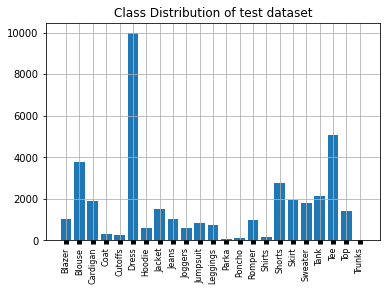

In [8]:
# # Class Distribution of test dataset

# test_dataset_class_indices = test_dataset.class_indices
# print("class indices of test dataset: ", test_dataset_class_indices)

# category_nums = {}

# for filename in test_dataset.filenames:
#     class_name = filename.split('/')[0]
#     if class_name not in category_nums:
#         category_nums[class_name] = 0
#     else:
#         category_nums[class_name] += 1


# print()       
# print("Sorted category nums of test dataset: ", sorted(category_nums.items(), key=lambda x: x[1], reverse=True))
# print()
# print("Total test dataset nums: ", sum(category_nums.values()))

# print()
# fig, ax = plt.subplots()
# plt.bar(list(category_nums.keys()), category_nums.values())
# plt.title("Class Distribution of test dataset")
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', width=5, labelsize=8)
# plt.grid(True)
# plt.show()

In [8]:
# class_labels = list(validation_dataset.class_indices.keys())
# num_imgs_validation = len(validation_dataset.filenames)
# num_imgs_train = len(train_dataset.filenames)
# num_imgs_test = len(test_dataset.filenames)
# print("class_labels_keys: ", class_labels)
# print("Length of class_labels: ", len(class_labels))
# print("Number of train images: ", num_imgs_train)
# print("Number of validation images: ", num_imgs_validation)
# print("Number of test images: ", num_imgs_test)

In [9]:
# Data Oversampling and Data Undersampling

# Test
class_names = ['Blazer', 'Blouse', 'Cardigan', 'Coat', 'Cutoffs', 'Dress', 'Hoodie', 'Jacket', 'Jeans', 'Joggers', 'Jumpsuit', 'Leggings', 'Parka', 'Poncho', 'Romper', 'Shirts', 'Shorts', 'Skirt', 'Sweater', 'Tank', 'Tee', 'Top', 'Trunks']

test_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/test'

test_paths = []

for cls in class_names:
    for f in glob.glob(test_path + '/' + cls + '/*.jpg'):
        if cls == 'Dress':
            test_paths.append(f)
        if cls == 'Trunks':
            for i in range(50):
                test_paths.append(f)
        if cls == 'Shirts' or cls == 'Parka':
            for i in range(20):
                test_paths.append(f)
        if cls == 'Cutoffs':
            for i in range(7):
                test_paths.append(f)
        if cls == 'Coat':
            for i in range(6):
                test_paths.append(f)
        if cls == 'Jeans':
            for i in range(2):
                test_paths.append(f)
        if cls == 'Joggers':
            for i in range(3):
                test_paths.append(f)
        if cls == 'Hoodie':
            for i in range(3):
                test_paths.append(f)
        if cls == 'Leggings' or cls == 'Jumpsuit' or cls == 'Romper' or cls == 'Blazer' or cls == 'Top' or cls == 'Jacket':
            for i in range(2):
                test_paths.append(f)
        if cls == 'Sweater' or cls == 'Cardigan' or cls == 'Skirts' or cls == 'Tank' or cls == 'Shorts':
            test_paths.append(f)

print(test_paths[0])
print(len(test_paths))

test_paths_class = []

for cls in class_names:
    for f in glob.glob(test_path + '/' + cls + '/*.jpg'):
        if cls == 'Dress':
            test_paths_class.append(f.split('/')[8])
        if cls == 'Trunks':
            for i in range(50):
                test_paths_class.append(f.split('/')[8])
        if cls == 'Shirts' or cls == 'Parka':
            for i in range(20):
                test_paths_class.append(f.split('/')[8])
        if cls == 'Cutoffs':
            for i in range(7):
                test_paths_class.append(f.split('/')[8])
        if cls == 'Coat':
            for i in range(6):
                test_paths_class.append(f.split('/')[8])
        if cls == 'Jeans':
            for i in range(2):
                test_paths_class.append(f.split('/')[8])
        if cls == 'Joggers':
            for i in range(3):
                test_paths_class.append(f.split('/')[8])
        if cls == 'Hoodie':
            for i in range(3):
                test_paths_class.append(f.split('/')[8])
        if cls == 'Leggings' or cls == 'Jumpsuit' or cls == 'Romper' or cls == 'Blazer' or cls == 'Top' or cls == 'Jacket':
            for i in range(2):
                test_paths_class.append(f.split('/')[8])
        if cls == 'Sweater' or cls == 'Cardigan' or cls == 'Skirts' or cls == 'Tank' or cls == 'Shorts':
            test_paths_class.append(f.split('/')[8])        

print(test_paths_class[0])
print(len(test_paths_class))

test_df = {'filepath': test_paths, 'class_name': test_paths_class}
df_test = pd.DataFrame(test_df)
print(df_test.head())

test_csv_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/sampling_dataframe/test6.csv'
df_test.to_csv(test_csv_path)

/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/test/Blazer/Tailored_Woven_Blazer_img_00000121_gt_43-62-156-260_iou_1.0.jpg
47694
Blazer
47694
                                            filepath class_name
0  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
1  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
2  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
3  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
4  /home/azure/passion/AI/CategoryandAttributePre...     Blazer


In [15]:
test_csv_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/sampling_dataframe/test6.csv'
test_df = pd.read_csv(test_csv_path)
test_df.head()

,Unnamed: 0,filepath,class_name
0,0,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
1,1,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
2,2,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
3,3,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
4,4,/home/azure/passion/AI/CategoryandAttributePre...,Blazer


In [16]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='class_name',
    target_size=(img_row, img_col),
    batch_size=batch_size_validation
)

Found 40193 validated image filenames belonging to 19 classes.


In [17]:
category_nums = {}

print(test_generator.filenames[0].split('/')[8])

for filename in test_generator.filenames:
    class_name = filename.split('/')[8]
    if class_name not in category_nums:
        category_nums[class_name] = 0
    else:
        category_nums[class_name] += 1


# print(category_nums)        
print(sorted(category_nums.items(), key=lambda x: x[1], reverse=True))
print(sum(category_nums.values()))

Blazer
[('Shirts', 3039), ('Jacket', 3015), ('Top', 2821), ('Shorts', 2770), ('Dress', 2466), ('Tank', 2127), ('Jeans', 2097), ('Blazer', 2093), ('Trunks', 2049), ('Romper', 1987), ('Coat', 1925), ('Cardigan', 1876), ('Sweater', 1812), ('Hoodie', 1790), ('Parka', 1739), ('Joggers', 1724), ('Cutoffs', 1700), ('Jumpsuit', 1697), ('Leggings', 1447)]
40174


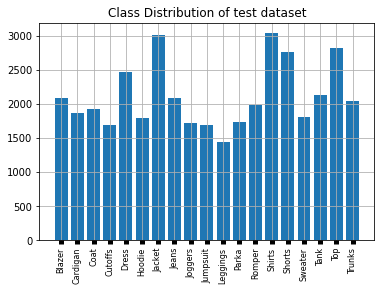

In [19]:
fig, ax = plt.subplots()
plt.bar(list(category_nums.keys()), category_nums.values())
plt.title("Class Distribution of test dataset")
plt.xticks(rotation=90)
plt.tick_params(axis='x', width=5, labelsize=8)
plt.grid(True)
plt.show()

In [20]:
# Data Oversampling and Data Undersampling

# Train
class_names = ['Blazer', 'Blouse', 'Cardigan', 'Coat', 'Cutoffs', 'Dress', 'Hoodie', 'Jacket', 'Jeans', 'Joggers', 'Jumpsuit', 'Leggings', 'Parka', 'Poncho', 'Romper', 'Shirts', 'Shorts', 'Skirt', 'Sweater', 'Tank', 'Tee', 'Top', 'Trunks']

train_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/train'

train_paths = []

for cls in class_names:
    for f in glob.glob(train_path + '/' + cls + '/*.jpg'):
        if cls == 'Dress':
            train_paths.append(f)
        if cls == 'Trunks':
            for i in range(50):
                train_paths.append(f)
        if cls == 'Shirts' or cls == 'Parka':
            for i in range(20):
                train_paths.append(f)
        if cls == 'Cutoffs':
            for i in range(7):
                train_paths.append(f)
        if cls == 'Coat':
            for i in range(6):
                train_paths.append(f)
        if cls == 'Jeans':
            for i in range(2):
                train_paths.append(f)
        if cls == 'Joggers':
            for i in range(3):
                train_paths.append(f)
        if cls == 'Hoodie':
            for i in range(3):
                train_paths.append(f)
        if cls == 'Leggings' or cls == 'Jumpsuit' or cls == 'Romper' or cls == 'Blazer' or cls == 'Top' or cls == 'Jacket':
            for i in range(2):
                train_paths.append(f)
        if cls == 'Sweater' or cls == 'Cardigan' or cls == 'Skirts' or cls == 'Tank' or cls == 'Shorts':
            train_paths.append(f)

print(train_paths[0])
print(len(train_paths))

train_paths_class = []

for cls in class_names:
    for f in glob.glob(train_path + '/' + cls + '/*.jpg'):
        if cls == 'Dress':
            train_paths_class.append(f.split('/')[8])
        if cls == 'Trunks':
            for i in range(50):
                train_paths_class.append(f.split('/')[8])
        if cls == 'Shirts' or cls == 'Parka':
            for i in range(20):
                train_paths_class.append(f.split('/')[8])
        if cls == 'Cutoffs':
            for i in range(7):
                train_paths_class.append(f.split('/')[8])
        if cls == 'Coat':
            for i in range(6):
                train_paths_class.append(f.split('/')[8])
        if cls == 'Jeans':
            for i in range(2):
                train_paths_class.append(f.split('/')[8])
        if cls == 'Joggers':
            for i in range(3):
                train_paths_class.append(f.split('/')[8])
        if cls == 'Hoodie':
            for i in range(3):
                train_paths_class.append(f.split('/')[8])
        if cls == 'Leggings' or cls == 'Jumpsuit' or cls == 'Romper' or cls == 'Blazer' or cls == 'Top' or cls == 'Jacket':
            for i in range(2):
                train_paths_class.append(f.split('/')[8])
        if cls == 'Sweater' or cls == 'Cardigan' or cls == 'Skirts' or cls == 'Tank' or cls == 'Shorts':
            train_paths_class.append(f.split('/')[8])
        

print(train_paths_class[0])
print(len(train_paths_class))

train_df = {'filepath': train_paths, 'class_name': train_paths_class}
df_train = pd.DataFrame(train_df)
print(df_train.head())

train_csv_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/sampling_dataframe/train6.csv'
df_train.to_csv(train_csv_path)

/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/train/Blazer/Zippered_Shawl_Collar_Blazer_img_00000116_gt_81-76-238-275_iou_1.0.jpg
251780
Blazer
251780
                                            filepath class_name
0  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
1  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
2  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
3  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
4  /home/azure/passion/AI/CategoryandAttributePre...     Blazer


In [25]:
train_csv_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/sampling_dataframe/train6.csv'
train_df = pd.read_csv(train_csv_path)
train_df.head()

,Unnamed: 0,filepath,class_name
0,0,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
1,1,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
2,2,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
3,3,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
4,4,/home/azure/passion/AI/CategoryandAttributePre...,Blazer


In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='class_name',
    target_size=(img_row, img_col),
    batch_size=batch_size_train
)

Found 212677 validated image filenames belonging to 19 classes.


In [27]:
category_nums = {}

print(train_generator.filenames[0].split('/')[8])

for filename in train_generator.filenames:
    class_name = filename.split('/')[8]
    if class_name not in category_nums:
        category_nums[class_name] = 0
    else:
        category_nums[class_name] += 1


# print(category_nums)        
print(sorted(category_nums.items(), key=lambda x: x[1], reverse=True))
print(sum(category_nums.values()))

Blazer
[('Jacket', 15795), ('Shirts', 15279), ('Top', 14539), ('Trunks', 14349), ('Shorts', 14194), ('Dress', 13034), ('Tank', 11203), ('Jeans', 11137), ('Romper', 10849), ('Blazer', 10815), ('Parka', 9819), ('Joggers', 9779), ('Sweater', 9615), ('Coat', 9611), ('Cardigan', 9605), ('Jumpsuit', 8927), ('Hoodie', 8729), ('Cutoffs', 8238), ('Leggings', 7141)]
212658


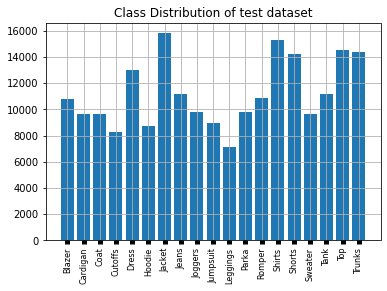

In [28]:
fig, ax = plt.subplots()
plt.bar(list(category_nums.keys()), category_nums.values())
plt.title("Class Distribution of train dataset")
plt.xticks(rotation=90)
plt.tick_params(axis='x', width=5, labelsize=8)
plt.grid(True)
plt.show()

In [31]:
# Data Oversampling and Data Undersampling

# Validation
class_names = ['Blazer', 'Blouse', 'Cardigan', 'Coat', 'Cutoffs', 'Dress', 'Hoodie', 'Jacket', 'Jeans', 'Joggers', 'Jumpsuit', 'Leggings', 'Parka', 'Poncho', 'Romper', 'Shirts', 'Shorts', 'Skirt', 'Sweater', 'Tank', 'Tee', 'Top', 'Trunks']

validation_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/validation'

validation_paths = []

for cls in class_names:
    for f in glob.glob(validation_path + '/' + cls + '/*.jpg'):
        if cls == 'Dress':
            validation_paths.append(f)
        if cls == 'Trunks':
            for i in range(50):
                validation_paths.append(f)
        if cls == 'Shirts' or cls == 'Parka':
            for i in range(20):
                validation_paths.append(f)
        if cls == 'Cutoffs':
            for i in range(7):
                validation_paths.append(f)
        if cls == 'Coat':
            for i in range(6):
                validation_paths.append(f)
        if cls == 'Jeans':
            for i in range(2):
                validation_paths.append(f)
        if cls == 'Joggers':
            for i in range(3):
                validation_paths.append(f)
        if cls == 'Hoodie':
            for i in range(3):
                validation_paths.append(f)
        if cls == 'Leggings' or cls == 'Jumpsuit' or cls == 'Romper' or cls == 'Blazer' or cls == 'Top' or cls == 'Jacket':
            for i in range(2):
                validation_paths.append(f)
        if cls == 'Sweater' or cls == 'Cardigan' or cls == 'Skirts' or cls == 'Tank' or cls == 'Shorts':
            validation_paths.append(f)

print(validation_paths[0])
print(len(validation_paths))

validation_paths_class = []

for cls in class_names:
    for f in glob.glob(validation_path + '/' + cls + '/*.jpg'):
        if cls == 'Dress':
            validation_paths_class.append(f.split('/')[8])
        if cls == 'Trunks':
            for i in range(50):
                validation_paths_class.append(f.split('/')[8])
        if cls == 'Shirts' or cls == 'Parka':
            for i in range(20):
                validation_paths_class.append(f.split('/')[8])
        if cls == 'Cutoffs':
            for i in range(7):
                validation_paths_class.append(f.split('/')[8])
        if cls == 'Coat':
            for i in range(6):
                validation_paths_class.append(f.split('/')[8])
        if cls == 'Jeans':
            for i in range(2):
                validation_paths_class.append(f.split('/')[8])
        if cls == 'Joggers':
            for i in range(3):
                validation_paths_class.append(f.split('/')[8])
        if cls == 'Hoodie':
            for i in range(3):
                validation_paths_class.append(f.split('/')[8])
        if cls == 'Leggings' or cls == 'Jumpsuit' or cls == 'Romper' or cls == 'Blazer' or cls == 'Top' or cls == 'Jacket':
            for i in range(2):
                validation_paths_class.append(f.split('/')[8])
        if cls == 'Sweater' or cls == 'Cardigan' or cls == 'Skirts' or cls == 'Tank' or cls == 'Shorts':
            validation_paths_class.append(f.split('/')[8])
        

print(validation_paths_class[0])
print(len(validation_paths_class))

validation_df = {'filepath': validation_paths, 'class_name': validation_paths_class}
df_validation = pd.DataFrame(validation_df)
print(df_validation.head())

validation_csv_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/sampling_dataframe/validation6.csv'
df_validation.to_csv(validation_csv_path)

/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/validation/Blazer/Notched_Open-Front_Textured_Blazer_img_00000018_gt_59-57-189-267_iou_1.0.jpg
47982
Blazer
47982
                                            filepath class_name
0  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
1  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
2  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
3  /home/azure/passion/AI/CategoryandAttributePre...     Blazer
4  /home/azure/passion/AI/CategoryandAttributePre...     Blazer


In [36]:
validation_csv_path = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/sampling_dataframe/validation6.csv'
validation_df = pd.read_csv(validation_csv_path)
validation_df.head()

,Unnamed: 0,filepath,class_name
0,0,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
1,1,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
2,2,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
3,3,/home/azure/passion/AI/CategoryandAttributePre...,Blazer
4,4,/home/azure/passion/AI/CategoryandAttributePre...,Blazer


In [37]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    x_col='filepath',
    y_col='class_name',
    target_size=(img_row, img_col),
    batch_size=batch_size_validation
)

Found 40481 validated image filenames belonging to 19 classes.


In [38]:
category_nums = {}

print(validation_generator.filenames[0].split('/')[8])

for filename in validation_generator.filenames:
    class_name = filename.split('/')[8]
    if class_name not in category_nums:
        category_nums[class_name] = 0
    else:
        category_nums[class_name] += 1


# print(category_nums)        
print(sorted(category_nums.items(), key=lambda x: x[1], reverse=True))
print(sum(category_nums.values()))

Blazer
[('Jacket', 3059), ('Trunks', 2899), ('Top', 2793), ('Shorts', 2699), ('Shirts', 2599), ('Dress', 2550), ('Jeans', 2103), ('Tank', 2096), ('Blazer', 2079), ('Romper', 1977), ('Parka', 1959), ('Sweater', 1839), ('Cardigan', 1827), ('Coat', 1763), ('Cutoffs', 1742), ('Joggers', 1742), ('Jumpsuit', 1679), ('Hoodie', 1622), ('Leggings', 1435)]
40462


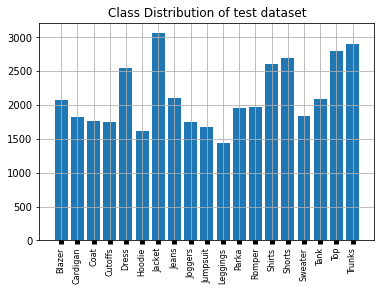

In [39]:
fig, ax = plt.subplots()
plt.bar(list(category_nums.keys()), category_nums.values())
plt.title("Class Distribution of test dataset")
plt.xticks(rotation=90)
plt.tick_params(axis='x', width=5, labelsize=8)
plt.grid(True)
plt.show()

In [40]:
# Dataset Summary
class_labels_sampling = list(train_generator.class_indices.keys())
print("class labels sampling keys: ", class_labels_sampling)
print("The number of class labels: ", len(class_labels_sampling))
num_imgs_train_sampling = len(train_generator.filenames)
print("The number of train images sampling: ", num_imgs_train_sampling)
num_imgs_validation_sampling = len(validation_generator.filenames)
print("The number of validation images sampling: ", num_imgs_validation_sampling)
num_imgs_test_sampling = len(test_generator.filenames)
print("The number of testimages sampling: ", num_imgs_test_sampling)

class labels sampling keys:  ['Blazer', 'Cardigan', 'Coat', 'Cutoffs', 'Dress', 'Hoodie', 'Jacket', 'Jeans', 'Joggers', 'Jumpsuit', 'Leggings', 'Parka', 'Romper', 'Shirts', 'Shorts', 'Sweater', 'Tank', 'Top', 'Trunks']
The number of class labels:  19
The number of train images sampling:  212677
The number of validation images sampling:  40481
The number of testimages sampling:  40193


In [41]:
# Initialize tne VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(img_row, img_col, img_channel))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f809db06630> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f809c7d8c18> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f815c127400> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f809cc11dd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f809cc9fb00> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f809cc9f9e8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f809cc4b198> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f809cc4b710> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f809cc93be0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f809cc52b38> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f809d2ced68> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f809cc42

In [42]:
def build_model(vgg_conv, category_nums, drop_rate, learning_rate, momentum_num):
    
    # Create the model
    model = tf.keras.models.Sequential()

    # Add the vgg convolutional base model
    model.add(vgg_conv)

    # Add new layers
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    model.add(Dense(19, activation='softmax'))

    # Compile the model with a SGD and a very slow learning rate
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    return model

In [43]:
model = build_model(vgg_conv, category_nums, drop_rate, learning_rate, momentum_num)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 19)                19475     
Total params: 40,429,395
Trainable params: 40,427,347
Non-trainable params: 2,048
________________________________________

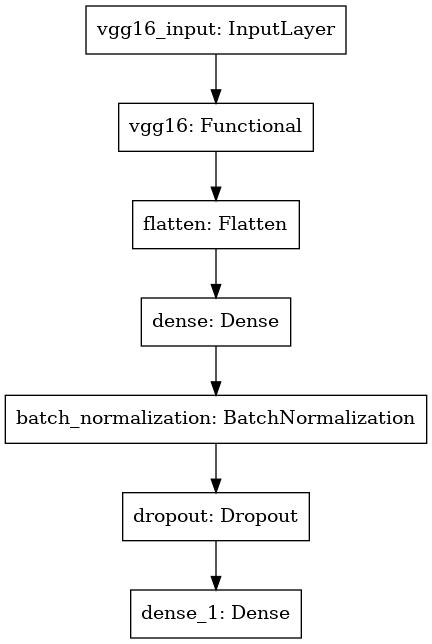

In [45]:
# Show a summary of the model
plot_model(model, to_file='/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/plot/model_summary6.jpg')

In [46]:
# Plotting Accuracy & Loss Curves
def curves(model_histories, epochs):

    acc = model_histories.history['accuracy']
    val_acc = model_histories.history['val_accuracy']
    loss = model_histories.history['loss']
    val_loss = model_histories.history['val_loss']

    # Plot
    plt.plot(range(epochs), acc, 'mo', label='Training accuracy')
    plt.plot(range(epochs), val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.savefig('/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/plot/DeepFashionVGG16CurvesAcc6.jpg')

    plt.figure()
    plt.plot(range(epochs), loss, 'mo', label='Training loss')
    plt.plot(range(epochs), val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig('/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/plot/DeepFashionVGG16CurvesLoss6.jpg')
    plt.show()

In [47]:
# Register Callbacks
def callback():
    
    # CSVLogger
    filename = '/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/output/csvlogger/model_train6.csv'
    csv_log = tf.keras.callbacks.CSVLogger(filename, separator=' ', append=False)
    
    # EarlyStopping
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='loss', patience=500, verbose=1, mode='min'
    )
    
    # ModelCheckpoint
    check_point = tf.keras.callbacks.ModelCheckpoint(
        filepath='/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/output/my_checkpoint6.ckpt',
        save_best_only=True, save_weights_only=True, monitor='val_loss'
    )
    
    callback_list = [csv_log, early_stopping, check_point]
    return callback_list

In [48]:
callback_list = callback()

In [49]:
# Fine-tune the model - Training
def fit_model(model, train_generator, validation_generator, batch_size_train, batch_size_validation, epochs):
    
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        workers=0,
        verbose=1,
        callbacks=callback_list
    )

    score = model.evaluate(
        validation_generator,
        verbose=1
    )

    return model, history, score

Epoch 1/10
3324/3324 [==============================] - 3024s 904ms/step - loss: 1.2453 - accuracy: 0.6018 - val_loss: 1.1897 - val_accuracy: 0.6336
Epoch 2/10
3324/3324 [==============================] - 2977s 896ms/step - loss: 0.6328 - accuracy: 0.7912 - val_loss: 1.5070 - val_accuracy: 0.6283
Epoch 3/10
3324/3324 [==============================] - 2979s 896ms/step - loss: 0.4139 - accuracy: 0.8632 - val_loss: 2.0141 - val_accuracy: 0.5977
Epoch 4/10
3324/3324 [==============================] - 2979s 896ms/step - loss: 0.2418 - accuracy: 0.9207 - val_loss: 2.1862 - val_accuracy: 0.5918
Epoch 5/10
3324/3324 [==============================] - 2963s 891ms/step - loss: 0.1405 - accuracy: 0.9548 - val_loss: 2.2015 - val_accuracy: 0.5978
Epoch 6/10
3324/3324 [==============================] - 2969s 893ms/step - loss: 0.0986 - accuracy: 0.9678 - val_loss: 2.0365 - val_accuracy: 0.6221
Epoch 7/10
3324/3324 [==============================] - 2965s 892ms/step - loss: 0.0764 - accuracy: 0.9759

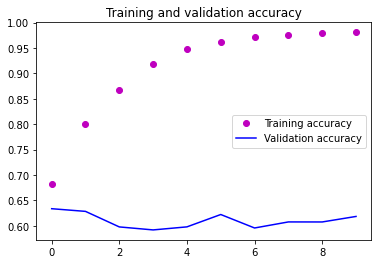

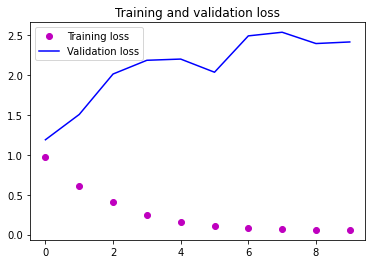

Validation Accuracy:0.6183147430419922 
Validation Loss:2.4159369468688965


In [50]:
model, history, score = fit_model(model, train_generator, validation_generator, batch_size_train, batch_size_validation, epochs)

# Learning curves
curves(history, epochs)
print('Validation Accuracy:{} \nValidation Loss:{}'.format(score[1] ,score[0]))

# Model Save
model.save('/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/save_model/my_model6.h5')

In [52]:
# Prediction
model.load_weights('/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/output/my_checkpoint6.ckpt')
Y_pred = model.predict(test_generator)

In [53]:
testY_labels = test_generator.labels
print(testY_labels)
print(len(testY_labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [56]:
# Confusion Matrix and Classification Report
def confusion_mat(Y_pred, testY_labels, class_labels_sampling):
    y_pred = np.argmax(Y_pred, axis=1)
    confusion_mat = confusion_matrix(testY_labels, y_pred)
#     classification_rep = classification_report(testY_labels, y_pred, target_names=class_labels)
    plt.figure(figsize=(6, 4))
    df_confusion_mat = pd.DataFrame(confusion_mat)
    sns.heatmap(df_confusion_mat, annot_kws={"size": 5}, linewidths=.5, cmap='PuBu',
               annot=True, yticklabels=class_labels_sampling, xticklabels=class_labels_sampling, fmt='g'
               )
    plt.xticks(rotation=90)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/plot/DeepFashionVGG16_confusion_matrix6')
    return plt

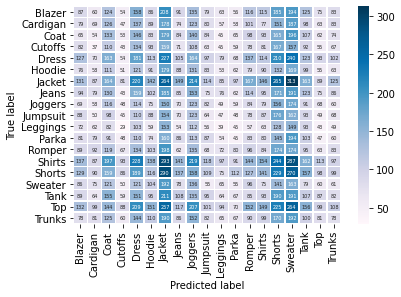

In [57]:
confusion_mat = confusion_mat(Y_pred, testY_labels, class_labels_sampling)

In [59]:
model.load_weights('/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/output/my_checkpoint6.ckpt')

loss, acc = model.evaluate(test_generator)
print("loss: ", loss)
print("acc: ", acc)

629/629 [==============================] - 152s 241ms/step - loss: 1.1877 - accuracy: 0.6394
loss:  1.1876941919326782
acc:  0.6394148468971252


In [63]:
# Tensorflow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('/home/azure/passion/AI/CategoryandAttributePredictionBenchmark/dataset/output/my_checkpoint6serving.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpyo4ev_ma/assets


INFO:tensorflow:Assets written to: /tmp/tmpyo4ev_ma/assets


161720092

AttributeError: 'DataFrameIterator' object has no attribute 'clsss_indices'